|First Name     |Last Name    |MtkNr.      |Due Date  | 
|:-------------:|:-----------:|:----------:|:--------:|
| Write Here    | Write Here  |12345678     | 20.01.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 4 – 3D Reconstruction </h2>>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 30-10-2024

<b>This file is part of the "Computer Vision Course 2024W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-1"><li style="font-size:large;font-weight:bold">Structure-from-Motion (SfM)</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-1"><li style="font-size:medium">Scene Reconstruction with COLMAP</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-1-2"><li style="font-size:medium">Analysis of Reconstruction Results</li></a>
</ol>
<a style="color:rgb(150,100,10)" href="#Head-topic-2"><li style="font-size:large;font-weight:bold">Light Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-2-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    <a style="color:rgb(150,100,10)" href="#Head-topic-3"><li style="font-size:large;font-weight:bold">Neural Radiance Fields</li></a>
    <ol style="margin-bottom:10px">
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-1"><li style="font-size:medium">Experiment 1</li></a>
        <a style="color:rgb(150,100,10)" href="#Sub-Head-topic-3-2"><li style="font-size:medium">Experiment 2</li></a>
</ol>
    
</ol>

<h1 style="color:rgb(255,0,0)">Important Note</h1>

<b>All cells must be evaluated, and any unevaluated cell may lead to a loss of points, regardless of the correctness of the code.</b>

In [12]:
from matplotlib import pyplot as plt
import os
import cv2
if not os.path.exists('resources'): raise TypeError("Please create the resources folder")

<a name="Head-topic-1"></a><h2>Structure-from-Motion (SfM)</h2>
    
The main goal is to utilize COLMAP for scene reconstruction. 

You need to download <i><b>COLMAP version 3.8</b></i> from [this link](https://github.com/colmap/colmap/releases). After downloading, you can use <i><b>COLMAP.bat</b></i> to start the program.

Additionally, download the <i><b>south-building</b></i> dataset from [this link](https://demuc.de/colmap/datasets/).

<a name="Sub-Head-topic-1-1"></a><h3>Scene Reconstruction with COLMAP</h3>

<b>Exercise 1.1. [20 Points]</b>
   
<b>Goal:</b> The aim is to reconstruct a 3D model from the <i><b>south-building</b></i> dataset using the default parameters of COLMAP.

<b>Task</b>
<ul>

<li>Use the <i><b>128 images</b></i> provided and apply the default parameters of COLMAP.</li>
<li>Capture snapshots of the reconstructed scene from <i><b>three different perspectives</b></i> (e.g., front view, side view, and top view).</li>
</ul>

<b>Hint</b>
<ul> 
<li>You must save the snapshot in the <i><b>resources folder</b></i> with <b><i>.jpg</b></i> extension, then run the <i><b>draw_snapshots</b></i> function below to show the images.</li>
<li><span style="color:rgb(220,10,10)">Name your snapshots as follows: image_1,  image_2, and image_3.</span></li>
<li><span style="color:rgb(220,10,10)">The reconstruction process may take some time.</span></li>
</ul>


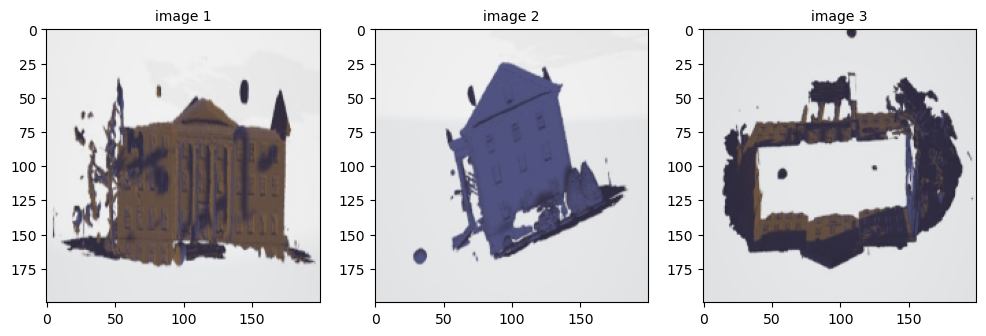

In [16]:
# After saving all snapshots, run this cell to show the snapshots

def draw_snapshots(img1 = 'resources/image_1.jpg', img2 = 'resources/image_2.jpg', img3 = 'resources/image_3.jpg'):
    size = (200, 200)
    
    img1 = cv2.cvtColor(cv2.imread(img1),cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(img2),cv2.COLOR_BGR2RGB)
    img3 = cv2.cvtColor(cv2.imread(img3),cv2.COLOR_BGR2RGB)
    
    img1 = cv2.resize(img1, size )
    img2 = cv2.resize(img2, size )
    img3 = cv2.resize(img3, size )
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('image 1', size=10),

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('image 2', size=10),

    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title('image 3', size=10),

    plt.show()

draw_snapshots()

<a name="Sub-Head-topic-1-2"></a><h3>Analysis of Reconstruction results</h3>

<b>Exercise 1.2. [30 Points]</b>

<b>Goal:</b> Now, let's analyze the result from <i><b>Exercise 1.1</b><i>. Look at the final values shown on the log screen on the right. Here, you will find a number called <i><b>final cost</b><i>.

<b>Question</b>
<ul>
<li>What does this error mean?</li>
<li>How does COLMAP determine this error?</li>
<li>Would you get the same or a different error if you repeat the experiment, and why?</li>
</ul>

#### Your answer goes here #### 

<li>The final cost in COLMAP is the reprojection error. It quantifies the discrepancy between The 2D keypoints detected in the input images., and the 2D projections of the 3D points (reconstructed model) back onto the images. Reprojection error is typically measured in pixels and reflects how well the reconstructed 3D model aligns with the original image data
    
<li> after extracting the matches features across images and estimating the camera poses and the initial sparse 3D points, it optimizes the camera posses, intrinsic parameters and 3D point positions, then applying the reprojection error function, finaly the final cost is computed from the average reprojection error over all observations

<li>the erro nay be sleghtly differ due to ramdom initializattion of parameters, also numerical optimization as it relies on iterative optimization algorithms, finally, some external factors can also cause variations like  floating-point precision, multithreading 


<a name="Head-topic-2"></a><h2>Light Fields</h2>

In the second part, we apply a simple light-field viewer. Please find it [here](https://hypothete.github.io/lightfield-webgl2/). Note that we have not talked about this in the lecture, and you need to do some background investigations yourself. Light-fields are related to Neural Radiance Fields (NeRFs), which were discussed in the lecture. You will explore this relationship here.


Light-field rendering is image-based rendering. The pioneering paper is from 1996 (please read this paper, and/or research the internet to understand the principles of light-field rendering):
https://graphics.stanford.edu/papers/light/light-lores.pdf

<a name="Sub-Head-topic-2-1"></a><h3>Experiment 1</h3>

<b>Exercise 2.1. [10 Points]</b>

<b>Goal:</b> Use the light-field viewer to explore how the images change when you change the aperture from narrow to wide<i>.

<b>Question</b>
<ul>
<li>What differences do you observe in the results when the aperture is wide compared to the result when the aperture is narrow?</li>
<li>What differences do you observe in the results when you change the focus?</li>
<li>Why don't you see any focus changes when the aperture is narrow?</li>
</ul>

#### Your answer goes here #### 
<li> When the aperture is narrow the resolution is good only n the center of the image, the rest of the image has bad resolution, but when it is wide the whole image has good resolution

<li> When the focus is narrow the resolution of the far objects is good the rest is bad, when the focus is wide the resolution of the close objects is good and the rest is bad

<li>because when the aperture is narrow the whole image already reaches the best resolution so the focus will not make any difference between the resolution of the close and far objects

<a name="Sub-Head-topic-2-2"></a><h3>Experiment 2</h3>

<b>Exercise 2.2. [15 Points]</b>

<b>Goal:</b> Now set the aperture to full width and change the focus to maximal (front / rear) distances. You observe image artifacts in the out-of-focus regions<i>.

<b>Question</b>
<ul>
<li>Why do these image artifacts appear?</li>
<li>What could you do by re-recording the light field to reduce such artifacts?</li>
<li>What could you do without re-recording the light field to reduce such artifacts?</li>
<li>Do you see a relationship between NeRFS and light-field?</li>
</ul>

#### Your answer goes here #### 


<li> The artifacts in out-of-focus regions occur due to undersampling of the light field

<li> we  can reduce artifacts by increase angular resolution using a higher number of cameras or viewpoints to capture the scene. Also Capture with Smaller Camera Baselines reducing the distance between adjacent cameras/views. lastly we can capture with higher spatial Resolution using higher-resolution cameras to improve image detail in each view.

<li> If re-recording is not possible, you can reduce artifacts through computational techniques like Post-Processing Techniques by applying denoising filters to smooth artifacts, also use edge-preserving filters to enhance sharpness without losing details. second we can use Super-Resolution Algorithms using light-field super-resolution to computationally synthesize intermediate views, effectively increasing angular resolution. lastly we can use Neural Approaches Leverage machine learning models to enhance light-field quality by filling in missing data or removing artifacts.

<li> Yes, there is a strong relationship between Neural Radiance Fields (NeRFs) and light fields. Both NeRFs and light fields allow for the generation of novel views by interpolating between captured viewpoints. Both approaches must deal with aliasing, artifacts, and view synthesis challenges, especially when input data is sparse or noisy.

<a name="Head-topic-3"></a><h2>Neural Radiance Fields</h2>
Let's now look at NeRFs in the third part of this assignment (you have learned about them in the lecture). Here is an online viewer and several sample scenes: https://nervv.tech/
Explore these scenes with the viewer.

<a name="Sub-Head-topic-3-1"></a><h3>Experiment 1</h3>

<b>Exercise 3.1. [10 Points]</b>

<b>Goal:</b> Investigate the differences between Light Fields and Neural Radiance Fields (NeRFs)<i>.

<b>Question</b>
<ul>
<li>What are the advantages and disadvantages of NeRF over Light Fields. Provide at least one pro and one contra argument for using NeRFs?</li>
</ul>

#### Your answer goes here #### 

Advantages of NeRFs (Pro):

<li>Compact Representation: NeRFs encode the scene as a continuous 3D function using a neural network, which is memory-efficient compared to storing a dense 4D light-field grid.6
    
<li>Sparse Input Requirement: NeRFs can reconstruct detailed 3D scenes  views from sparse input images, but Light Fields require dense sampling of viewpoints to achieve similar quality.
    
<li>High Quality in Novel View Synthesis: NeRFs uses neural networks to produce views smoothly, producing photorealistic results.


Disadvantages of NeRFs (Contra):

<li>High Computational Cost: Training a NeRF is computationally expensive and time-intensive, requiring significant GPU resources.

<li>Lack of Real-Time Performance: Light-field methods can achieve real-time rendering since they rely on pre-stored data, but NeRF rendering involves neural network evaluations, making it slower.

<li>Data Dependency: NeRFs are sensitive to noise or incomplete data nd depend on high-quality input images, which can degrade reconstruction quality.

<a name="Sub-Head-topic-3-2"></a><h3>Experiment 2</h3>

<b>Exercise 3.2. [15 Points]</b>

<b>Goal:</b> Explore NeRF reconstructions.<i>.

<b>Question</b>
<ul>
<li>Why is it possible to observe reconstructed points inside the objects (considering that only their outside surfaces are captured in the input images)? Are these reconstructions any meaningful or correct? </li>
</ul>

<b>Hint</b>
<ul>
<li>The correct answer is not trivial or straightforward!</li>
</ul>

#### Your answer goes here ####


Because NeRF represents the scene as a continuous volumetric field, estimating density at every point in space instead of explicitly modelling surfaces, points inside objects may show in NeRF reconstructions. Because of uncertainties in the input data and the neural network's smooth interpolation, this may lead to non-zero densities inside objects. Although they may sometimes reflect semi-transparent materials, these internal densities are usually artefacts with no physical relevance. Regularisation can be used to impose sparsity, extract surface meshes can be used to remove internal points, or more input views can be used to improve constraints.


